In [12]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import math
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

Eczema                   -    1

Psoriasis                -    2

Lichen Planus            -    3

Seborrheic Keratosis     -    4

Tinea Ringworm           -    5

Normal Skin              -    6

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


#one hot encoding - переводит вектор результатов в набор векторов
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)
y_train_cat[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [3]:
# Load data from csv file from dermatology_database_1.csv
file_path = os.path.join('dermatology_database_1.csv')

# Load the data
df = pd.read_csv(file_path)

In [35]:
df['age'] = df['age'].replace('?', np.nan)  # Replace '?' with NaN

# we remove rows with NaN values in the 'age' column using dropna() function
df.dropna(subset=['age'], inplace=True)

df['age'] = df['age'].astype(float).astype(pd.Int64Dtype())  # Convert to float and then to integer

# Print the name of the columns
print(df.columns)




Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')


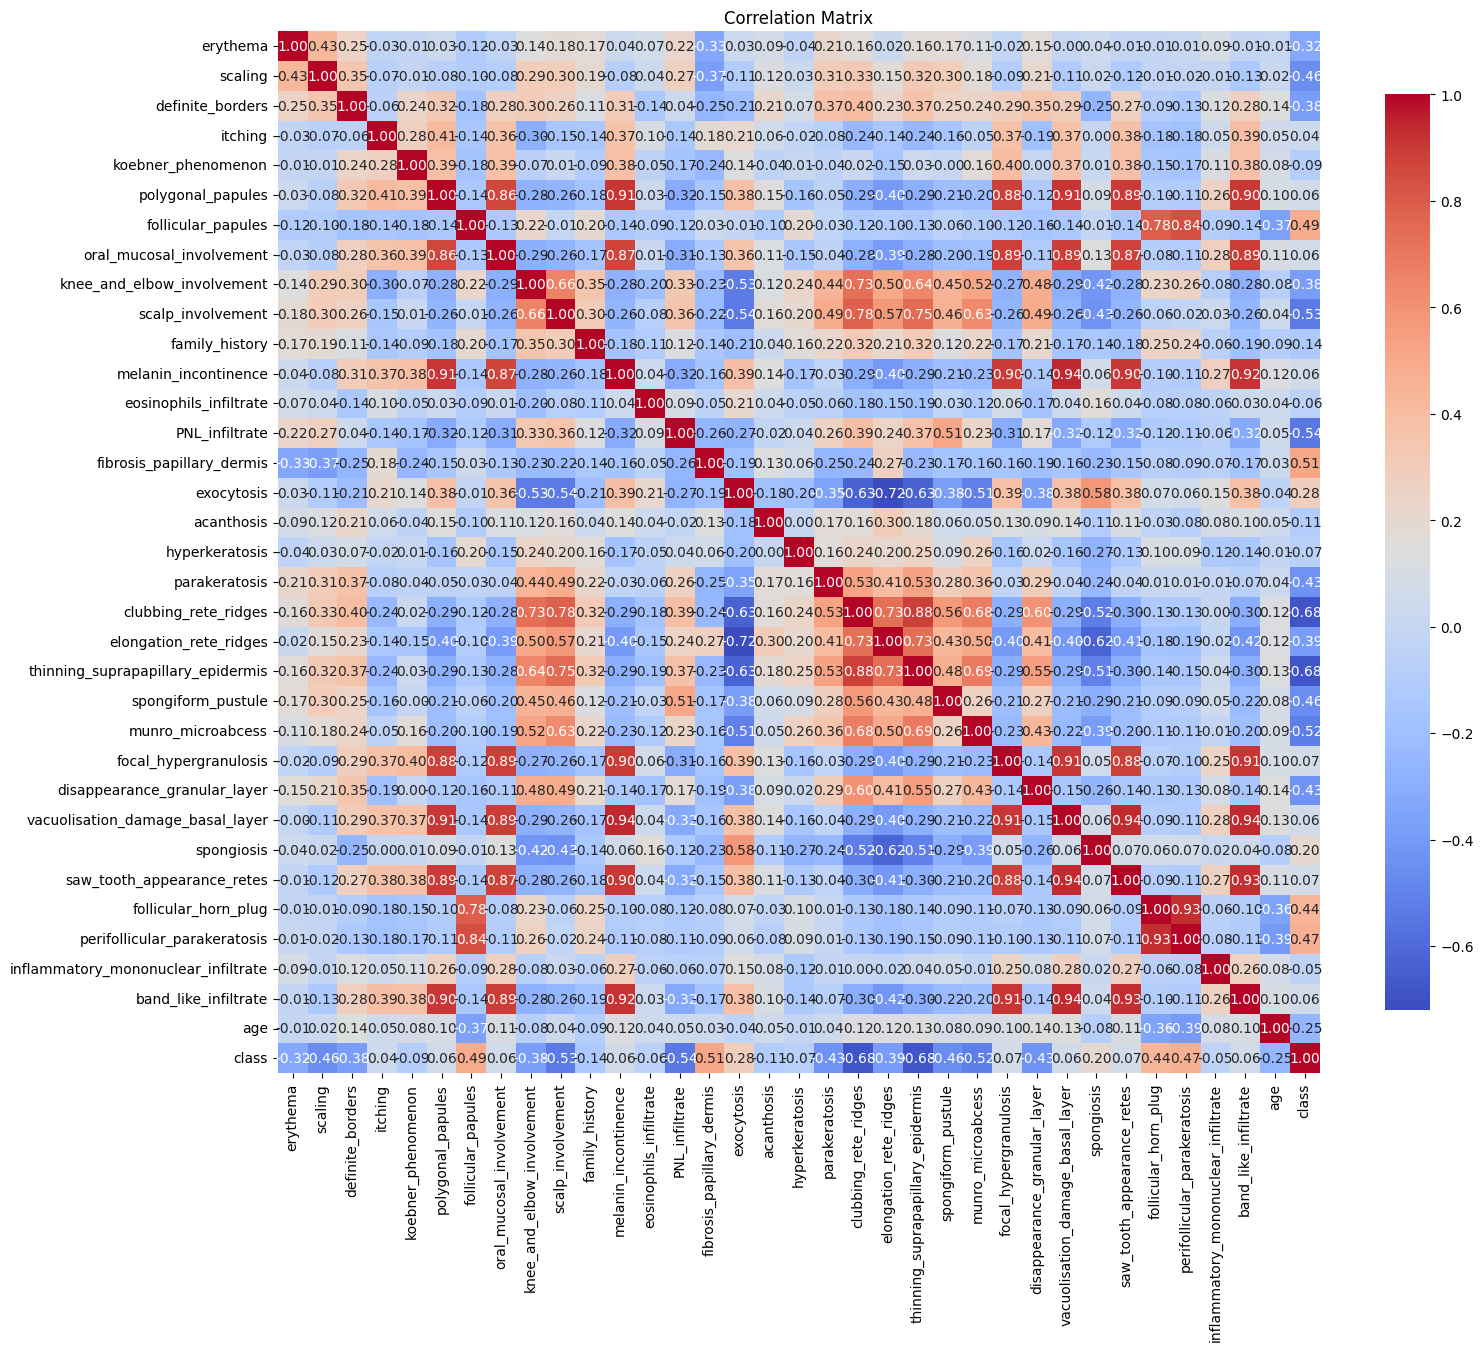

In [ ]:
# Calculate the correlation matrix
# corr_matrix = df.corr()
corr_matrix = df.corr(method='pearson')
# Display the correlation matrix
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

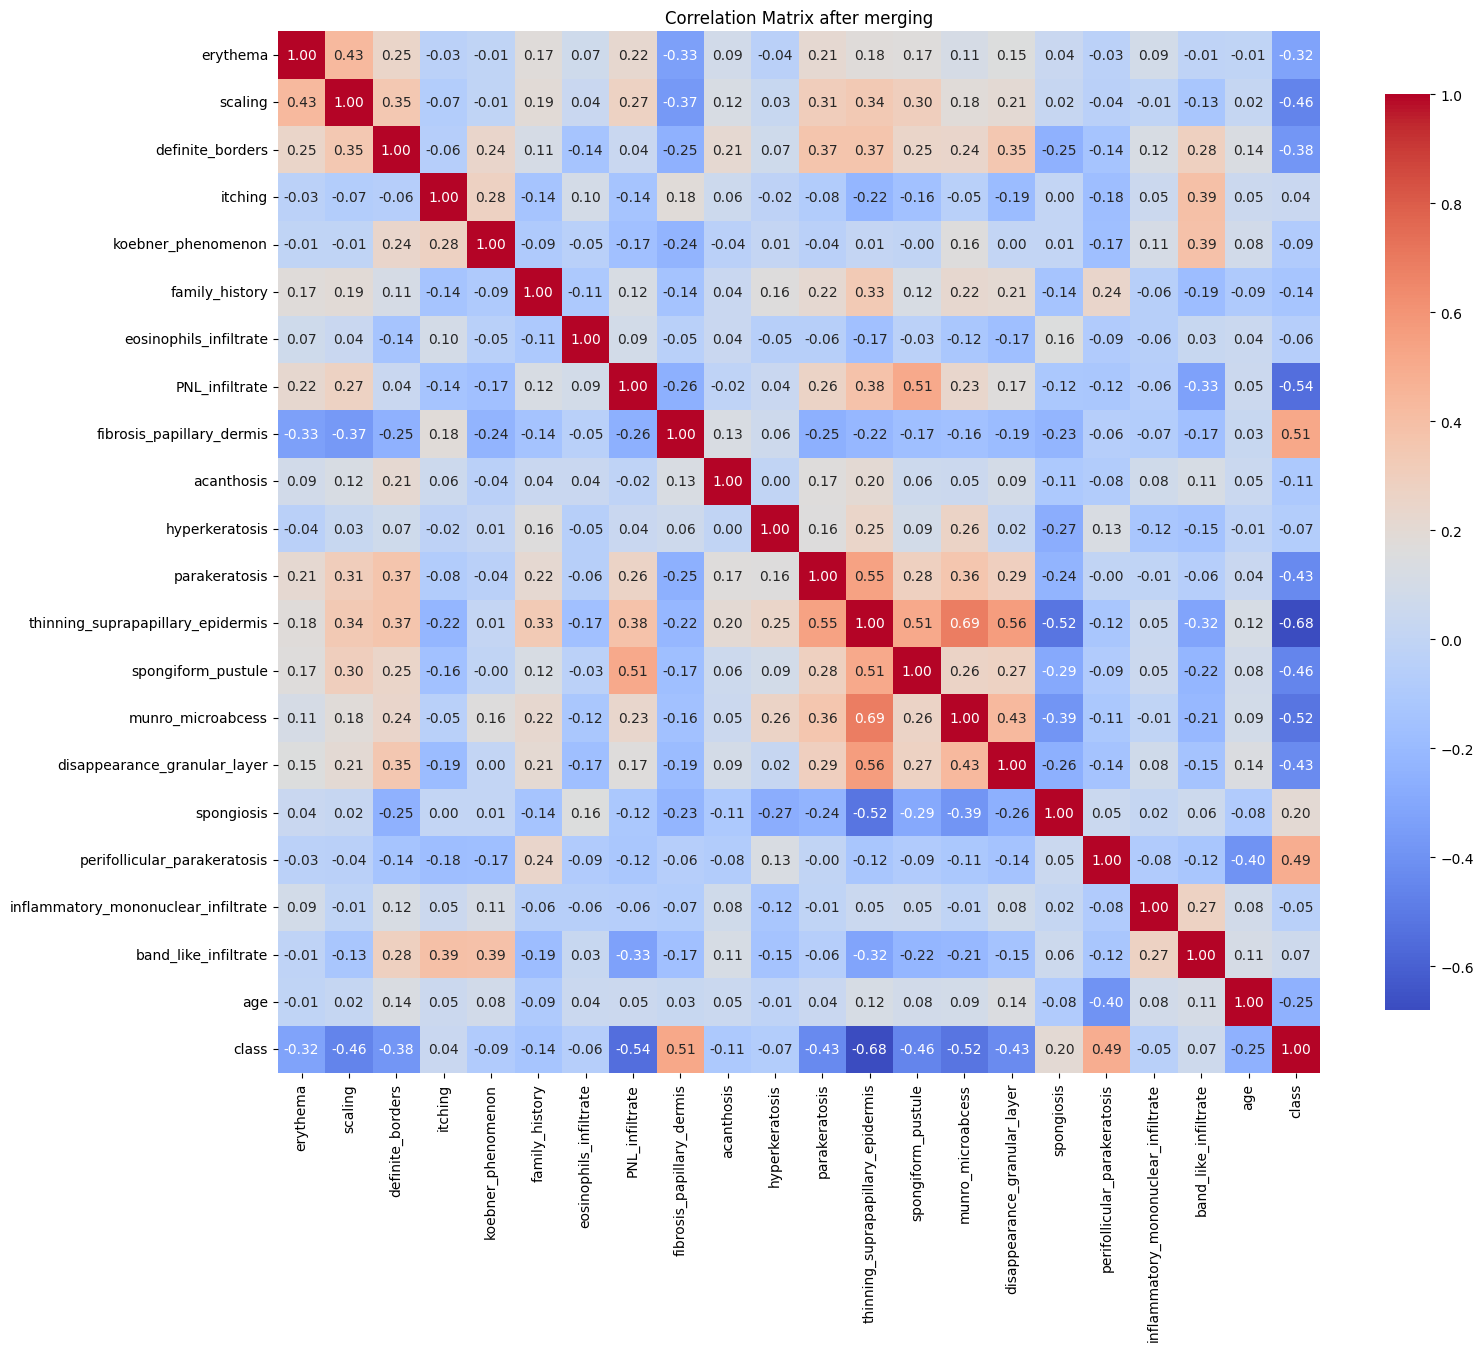

In [23]:
# copy df to df1
df1 = df.copy()
# If A and B corr > 0.7 merge it like (A + B)/2 df1
corr_matrix1 = df1.corr(method='pearson')
columns = corr_matrix1.columns.tolist()
columns_to_drop = []  # Keep track of columns to drop
for i in range(len(columns)):
    for j in range(i):
        if columns[j] in columns_to_drop:  # Skip already marked columns
            continue
        if abs(corr_matrix1.loc[columns[i], columns[j]]) > 0.7:
            colname = columns[i]
            df1[colname] = (df1[colname] + df1[columns[j]]) / 2
            columns_to_drop.append(columns[j])  # Mark column for dropping

# Drop the marked columns
df1.drop(columns=columns_to_drop, axis=1, inplace=True)
# Display new correlation matrix
corr_matrix1 = df1.corr(method='pearson')
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix1, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix after merging')
plt.tight_layout()
plt.show()

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 358 samples in 0.001s...
[t-SNE] Computed neighbors for 358 samples in 0.471s...
[t-SNE] Computed conditional probabilities for sample 358 / 358
[t-SNE] Mean sigma: 3.587629
[t-SNE] Computed conditional probabilities in 0.087s
[t-SNE] Iteration 50: error = 51.8545761, gradient norm = 0.0406368 (50 iterations in 0.132s)
[t-SNE] Iteration 100: error = 50.9178505, gradient norm = 0.0086950 (50 iterations in 0.084s)
[t-SNE] Iteration 150: error = 50.8928490, gradient norm = 0.0062967 (50 iterations in 0.080s)
[t-SNE] Iteration 200: error = 50.8954315, gradient norm = 0.0113404 (50 iterations in 0.119s)
[t-SNE] Iteration 250: error = 50.8930511, gradient norm = 0.0165392 (50 iterations in 0.078s)
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.893051
[t-SNE] Iteration 300: error = 0.3541053, gradient norm = 0.0061219 (50 iterations in 0.105s)
[t-SNE] Iteration 350: error = 0.3230104, gradient norm = 0.0034653 (

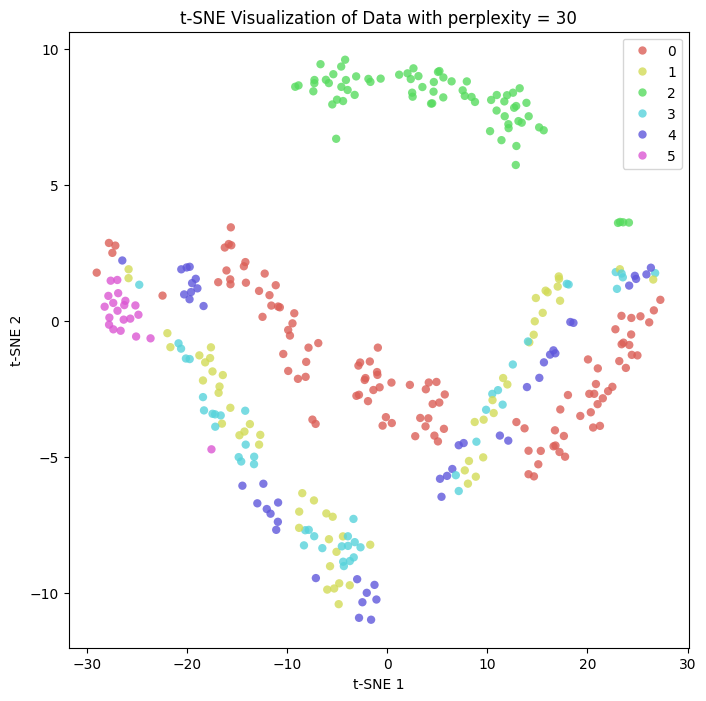

In [ ]:
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

le = LabelEncoder()
y = le.fit_transform(y)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=110, verbose=2)
x_tsne = tsne.fit_transform(x)


# Create a scatterplot of the t-SNE graph
plt.figure(figsize=(8, 8))
sns.scatterplot(
    x=x_tsne[:,0], y=x_tsne[:,1],
    hue=y, palette=sns.color_palette("hls", len(np.unique(y))),
    alpha=0.8, edgecolor='none'
)


plt.title('t-SNE Plot for Dermatology Dataset')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('t-SNE Visualization of Data with perplexity = 30')
plt.legend(loc='upper right')
plt.show()

In [8]:
# Split the date into train, cross-validation and test sets
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42), 
                       [int(.6*len(df)), int(.8*len(df))])

/usr/local/lib/python3.9/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        23
           2       0.55      0.67      0.60         9
           3       0.79      0.65      0.71        17
           4       0.58      0.70      0.64        10
           5       0.67      0.67      0.67         9
           6       0.33      0.25      0.29         4

    accuracy                           0.75        72
   macro avg       0.65      0.66      0.65        72
weighted avg       0.76      0.75      0.75        72



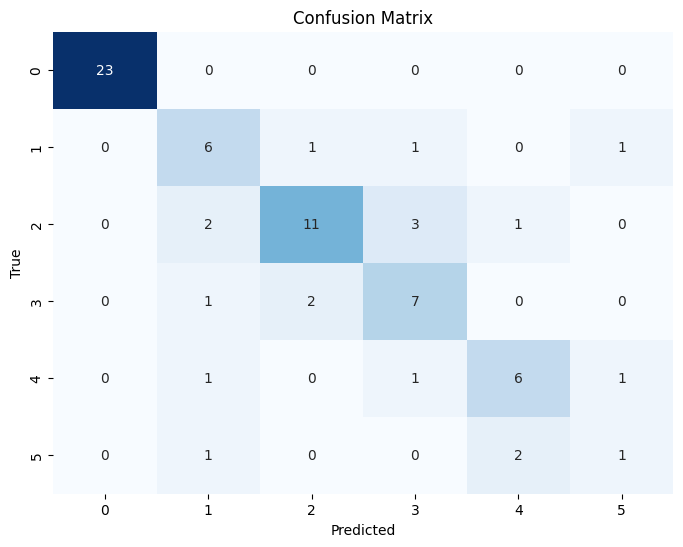

In [36]:
# Create Desitiontree model
# Create fitches and labels for train that should be: Age, Family Hystory, Scaling, Border, Thinning suprapapillary epidermis, erytema, itching and koebner phenomenon and spongiosis
X_train = train[['age', 'family_history', 'scaling', 'definite_borders', 'thinning_suprapapillary_epidermis', 'erythema', 'itching', 'koebner_phenomenon', 'spongiosis']].values
y_train = train['class'].values
X_validate = validate[['age', 'family_history', 'scaling', 'definite_borders', 'thinning_suprapapillary_epidermis', 'erythema', 'itching', 'koebner_phenomenon', 'spongiosis']].values
y_validate = validate['class'].values
# Create Desitiontree model
model = DecisionTreeClassifier(random_state=42)
# Fit the model
model.fit(X_train, y_train)
# Predict the labels for the validation set
y_pred = model.predict(X_validate)
# Print the classification report
print(classification_report(y_validate, y_pred))
# Print the confusion matrix
cm = confusion_matrix(y_validate, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()



              precision    recall  f1-score   support

           1       0.91      0.95      0.93        22
           2       0.69      0.75      0.72        12
           3       0.85      0.69      0.76        16
           4       0.67      0.60      0.63        10
           5       0.50      0.57      0.53         7
           6       0.67      0.80      0.73         5

    accuracy                           0.76        72
   macro avg       0.71      0.73      0.72        72
weighted avg       0.77      0.76      0.76        72



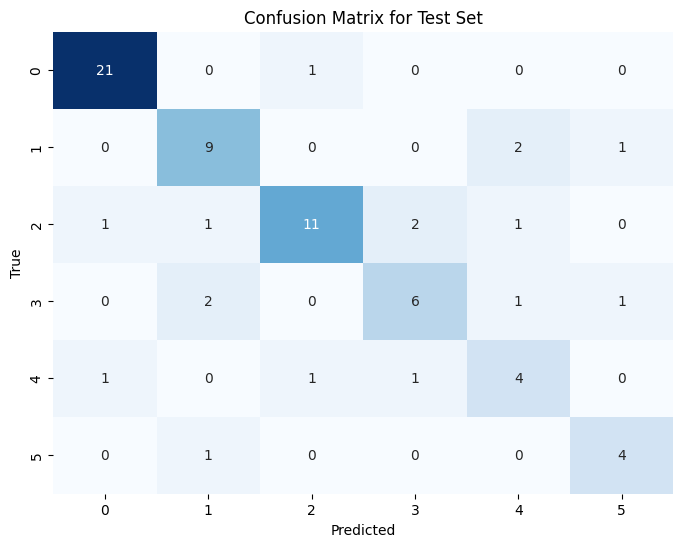

In [37]:
# Predict the labels for the test set
X_test = test[['age', 'family_history', 'scaling', 'definite_borders', 'thinning_suprapapillary_epidermis', 'erythema', 'itching', 'koebner_phenomenon',  'spongiosis']].values
y_test = test['class'].values
y_pred_test = model.predict(X_test)
# Print the classification report
print(classification_report(y_test, y_pred_test))
# Print the confusion matrix
cm_test = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix for Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()